utilizzate i dati sulle ore di studio e le ore di sonno , allenate l'algoritmo, testatelo e poi realizzate i vari grafici

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [57]:
X = df[["Hours Studied", "Sleep Hours"]]
y = df["Performance Index"]

In [58]:
x1 = X["Hours Studied"]
x2 = X["Sleep Hours"]
x1_range = np.linspace(x1.min(), x1.max(), 50)
x2_range = np.linspace(x2.min(), x2.max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [60]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
print("R^2", r2_score(y_test, y_pred))
print("MSE:", mse)

R^2 0.1432071047832596
MSE: 323.5427439508081


In [62]:
y_pred = y_pred.reshape(x1_grid.shape)

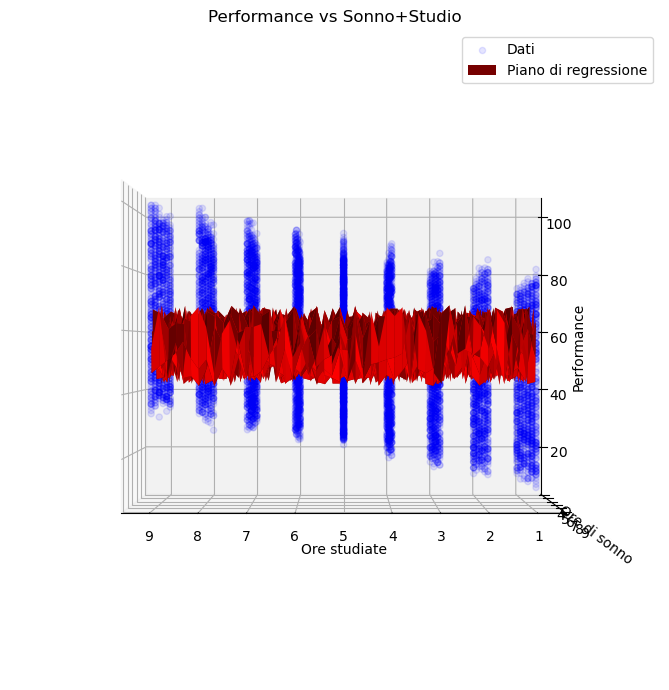

In [70]:
fig = plt.figure(figsize=(28, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x1, x2, y, color="blue", alpha=0.1, label="Dati")

ax.plot_surface(x1_grid, x2_grid, y_pred, color="red", alpha=1, label="Piano di regressione")
ax.view_init(elev=0, azim=90)

ax.set_xlabel("Ore studiate")
ax.set_ylabel("Ore di sonno")
ax.set_zlabel("Performance")
ax.set_title("Performance vs Sonno+Studio")
plt.legend()

plt.tight_layout()
plt.show()